In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

We want to compute the following integral:

$\int^\infty_0 x^3 exp\big(-\frac{x^2}{2\sigma}\big)dx$

The theoretical result is $2\sigma^4$

To compute the integral using montecarlo integration we can see that we can write the integral as:

$ \sqrt{2 \pi} \  \sigma \int^\infty_0 x^3 \ N(0,\sigma) dx$ 

We are integrating between 0 and $\infty$ so the gaussian is not correctly normalized. Instead of normalizing the distribution I rewrite the integral in the following way:

$ \sqrt{2 \pi} \  \sigma \int^\infty_{-\infty} \frac12 |x^3| \ N(0,\sigma) dx$

Montecarlo integration: 32.00504897263192
Theoretical result: 32


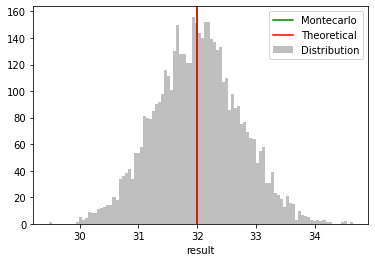

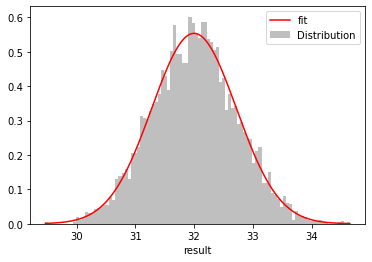

In [4]:
#defining sigma
sigma=2

vec=[]

#computing the integral multiple times to see how the result is distributed

for i in range(0,5000):
    
    #sampling from a normal distribution
    
    x=np.random.normal(0, sigma, 10**4)
    
    #computing the integral rewritten as explained before
    
    y=np.abs(x**3)/2
    integral=sigma*np.sqrt(2*np.pi)*np.mean(y)
    vec.append(integral)

#printing the result from montecarlo integration and from theory

print('Montecarlo integration:', np.mean(vec))
print('Theoretical result:', 2*sigma**4 )
plt.hist(vec,bins=100,color='gray',alpha=0.5,label='Distribution');
plt.axvline(np.mean(vec),color='green',label='Montecarlo')
plt.axvline(2*sigma**4,color='red',label='Theoretical')
plt.xlabel('result')
plt.legend()
plt.show()

#Trying a fit by hand with a gaussian:

grid=np.linspace(np.min(vec),np.max(vec),1000)
dist=norm(2*sigma**4,np.std(vec)).pdf(grid)
plt.plot(grid,dist,color='red',label='fit')
plt.hist(vec,bins=100,density=True,color='gray',alpha=0.5,label='Distribution');

plt.xlabel('result')

plt.legend()
plt.show()

Montecarlo integration: 31.992349107014668
Theoretical result: 32


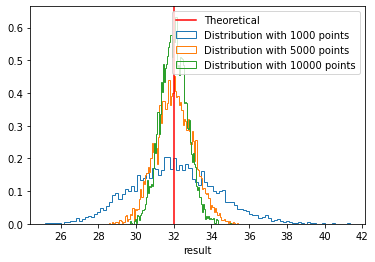

In [6]:
distribution=[]

for number in [1000,5000,10000]:
    
    vec=[]
    
    for i in range(0,5000):
    
        #sampling from a normal distribution
    
        x=np.random.normal(0, sigma, number)
    
        #computing the integral rewritten as explained before
    
        y=np.abs(x**3)/2
        integral=sigma*np.sqrt(2*np.pi)*np.mean(y)
        vec.append(integral)
    
    distribution.append(vec)

#printing the result from montecarlo integration and from theory
print('Montecarlo integration:', np.mean(vec))
print('Theoretical result:', 2*sigma**4 )
plt.hist(distribution[0],bins=100,density=True,histtype='step',label='Distribution with 1000 points');
plt.hist(distribution[1],bins=100,density=True,histtype='step',label='Distribution with 5000 points');
plt.hist(distribution[2],bins=100,density=True,histtype='step',label='Distribution with 10000 points');

plt.axvline(2*sigma**4,color='red',label='Theoretical')
plt.xlabel('result')
plt.legend()
plt.show()


In [7]:
#Computing the integral changing the number of sampled data
sigma=2

mean=[]
error=[]

#initial number sampled data

numbers=np.arange(1,10**4,10)

#integrating changing the number of sampled points

for f in numbers:
    
    vec=[]
    for i in range(0,10):
        #sampling
        
        x=np.random.normal(0, sigma, f)
        
        #computing the integral
        
        y=np.abs(x**3)/2
        integral=np.sqrt(2*np.pi)*2*np.mean(y)
        vec.append(integral)
    #upgrading the mean and error vectors
    
    mean.append(np.mean(vec))
    error.append(np.std(vec)/np.sqrt(f))


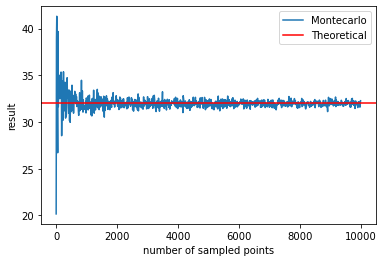

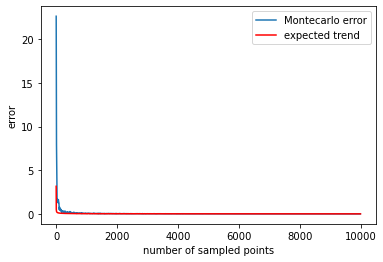

In [8]:
#plotting the results

plt.plot(numbers,mean,label='Montecarlo')
plt.axhline(2*sigma**4,color='red',label='Theoretical')
plt.xlabel('number of sampled points')
plt.ylabel('result')
plt.legend()
plt.show()

#plotting the errors

plt.plot(numbers,error,label='Montecarlo error')
N=np.arange(0.1,10000)

#the expected error comes from the central limit theorem

plt.plot(1/(N)**0.5,color='red',label='expected trend')
plt.xlabel('number of sampled points')
plt.ylabel('error')
plt.legend()
plt.show()